In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
from plot_functions import *
from importlib import reload  
import sys
sys.path.append("/home/mlparker/programs/python_modules/plotting_functions/")
from step_plots import *
from matplotlib.ticker import *


C1='#D81B60'
C2='#1E88E5'
C3='#FFC107'
C4='#135247'
colors=[C1,C2,C3,C4]

In [6]:
def mutoi(mu):
    i=  np.arccos(mu)/2/np.pi*360
    return i

def itomu(i):
    mu=np.cos(i/320*2*np.pi)

In [7]:
datafile="simulated_spectra_2/dw_control/fits_dw_3to10.dat"
data=pd.read_csv(datafile)

data["i"]=mutoi(data["mu"])
data["fit_i"]=mutoi(data["fit_mu"])
data["delta_mdot"]=data["fit_mdot"]-data["mdot"]
data["delta_fv"]=data["fit_fv"]-data["fv"]
data["delta_lx"]=data["fit_lx"]-data["lx"]
data['redchi']=data['chi2']/data['dof']
# print(data[['chi2','dof']])

# print(data.columns)
print(data.shape[0])

clean_data=data[data['redchi']<1.5]
dirty_data=data[data['redchi']>2]
print(clean_data.shape[0],dirty_data.shape[0])

1000
990 0


0.7573354589779554
107 / 990


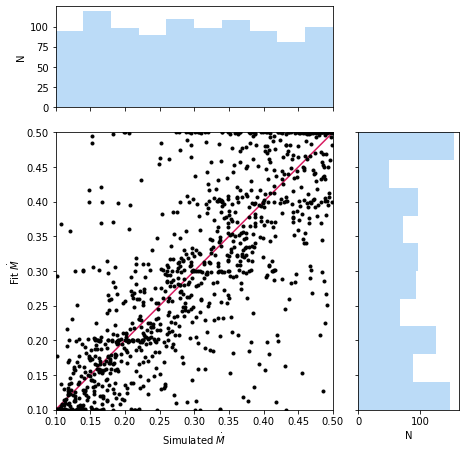

In [9]:
mdot_plot(clean_data)
print(clean_data.corr()['mdot']['fit_mdot'])
maxmdot=clean_data[clean_data['fit_mdot']>0.49]
print(maxmdot.shape[0],'/',clean_data.shape[0])
pl.savefig('figures/param_recovery/dw_control_mdot.pdf',bbox_inches='tight')

0.9584268693524711


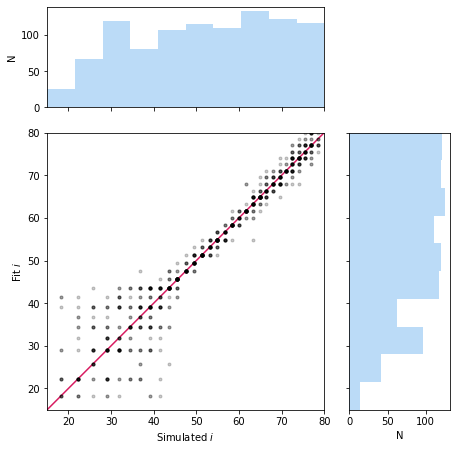

In [10]:
inc_plot(clean_data,alpha=0.2)
print(clean_data.corr()['i']['fit_i'])
pl.savefig('figures/param_recovery/dw_control_i.pdf',bbox_inches='tight')

0.9043142528611181


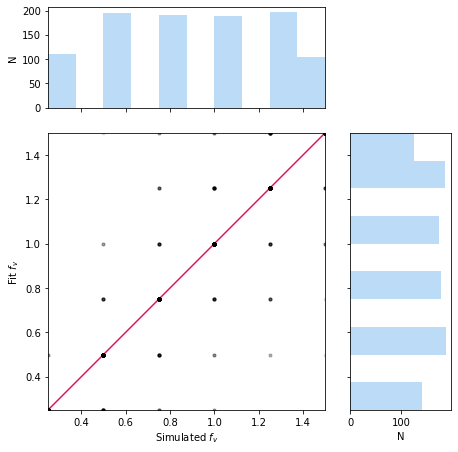

In [11]:
fv_plot(clean_data)
print(clean_data.corr()['fv']['fit_fv'])
pl.savefig('figures/param_recovery/dw_control_fv.pdf',bbox_inches='tight')

0.6746657630913623


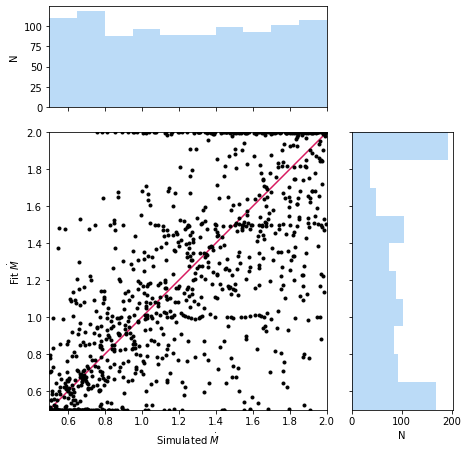

In [12]:
lx_plot(clean_data)
print(clean_data.corr()['lx']['fit_lx'])
pl.savefig('figures/param_recovery/dw_control_lx.pdf',bbox_inches='tight')